# Import essential libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis and Feature Engineer

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv',)

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The '?' sign is the reason why many columns has object dtypes. I will replace it with np.nan so that I can convert them to numerical data type for further featuring.

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df = df.apply(pd.to_numeric)

In [9]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## Filling missing data

<AxesSubplot:>

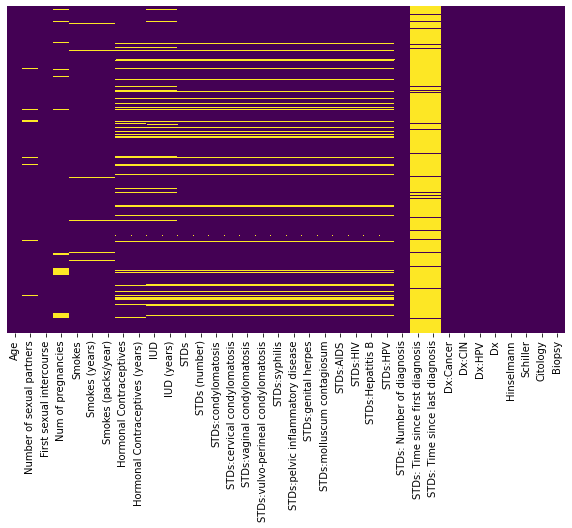

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Drop STDs: Time since first diagnosis and STDs: Time since last diagnosis because there are a lot of missing values**

In [11]:
df.drop(['STDs: Time since last diagnosis','STDs: Time since first diagnosis'],axis=1,inplace=True)

In [12]:
df.corr()['Number of sexual partners']

Age                                   0.085634
Number of sexual partners             1.000000
First sexual intercourse             -0.150169
Num of pregnancies                    0.079081
Smokes                                0.249441
Smokes (years)                        0.186932
Smokes (packs/year)                   0.182067
Hormonal Contraceptives               0.006738
Hormonal Contraceptives (years)       0.019569
IUD                                   0.031683
IUD (years)                           0.004454
STDs                                  0.056852
STDs (number)                         0.041442
STDs:condylomatosis                   0.036416
STDs:cervical condylomatosis               NaN
STDs:vaginal condylomatosis          -0.045098
STDs:vulvo-perineal condylomatosis    0.038627
STDs:syphilis                         0.028557
STDs:pelvic inflammatory disease      0.032165
STDs:genital herpes                  -0.033437
STDs:molluscum contagiosum            0.032165
STDs:AIDS    

In [13]:
df['STDs:cervical condylomatosis'].nunique()

1

In [14]:
df['STDs:AIDS'].nunique()

1

**Drop 'STDs:cervical condylomatosis' and 'STDs:AIDS' because they have no predictive value**

In [15]:
df.drop(['STDs:AIDS','STDs:cervical condylomatosis'],axis=1,inplace=True)

### Exploring 'Number of sexual partners'

In [16]:
df.corr()['Number of sexual partners'].sort_values()

First sexual intercourse             -0.150169
STDs:vaginal condylomatosis          -0.045098
Hinselmann                           -0.039847
STDs:genital herpes                  -0.033437
STDs:Hepatitis B                     -0.011570
Schiller                             -0.008967
Biopsy                               -0.001442
IUD (years)                           0.004454
Hormonal Contraceptives               0.006738
STDs:HPV                              0.014573
Dx:CIN                                0.015694
Hormonal Contraceptives (years)       0.019569
STDs:HIV                              0.021477
Citology                              0.021858
Dx:Cancer                             0.022316
Dx                                    0.022992
Dx:HPV                                0.027273
STDs:syphilis                         0.028557
IUD                                   0.031683
STDs:molluscum contagiosum            0.032165
STDs:pelvic inflammatory disease      0.032165
STDs:condylom

<AxesSubplot:xlabel='Number of sexual partners', ylabel='count'>

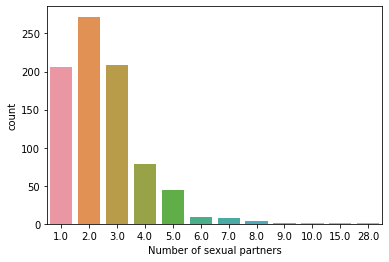

In [17]:
sns.countplot(x='Number of sexual partners', data=df)

<AxesSubplot:xlabel='Hormonal Contraceptives', ylabel='Number of sexual partners'>

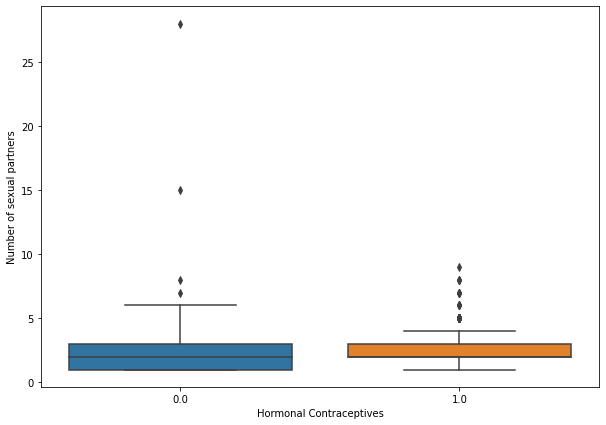

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Hormonal Contraceptives',y='Number of sexual partners',data=df)

2 is the dominant value in this feature so I will replace all null values by 2

In [19]:
df['Number of sexual partners'].replace(np.nan,2,inplace=True)

15 and 28 are absolutely outliers and may affect the accuracy of the model. I will drop them

In [20]:
df = df[df['Number of sexual partners'] < 11]

### Exploring 'First sexual intercourse'

<AxesSubplot:>

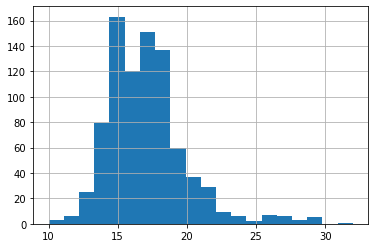

In [21]:
df['First sexual intercourse'].hist(bins=20)

In [22]:
int(df['First sexual intercourse'].mean())

17

Since 'First sexual intercourse' is a continuous data, I will replace missing value by the mean

In [23]:
df['First sexual intercourse'].replace(np.nan, int(df['First sexual intercourse'].mean()),inplace=True)

### Exploring 'Num of pregnancies'

<AxesSubplot:xlabel='Hormonal Contraceptives', ylabel='Num of pregnancies'>

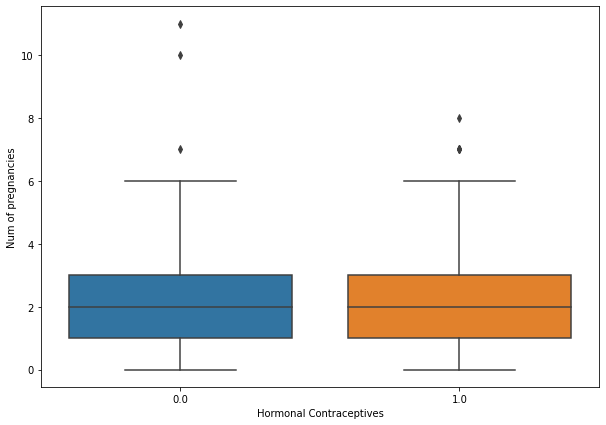

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Hormonal Contraceptives',y='Num of pregnancies',data=df)

<AxesSubplot:xlabel='Num of pregnancies', ylabel='count'>

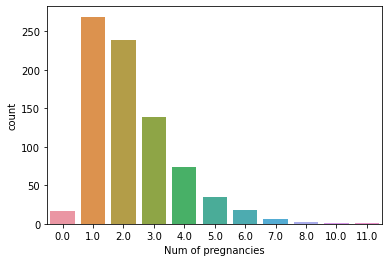

In [25]:
sns.countplot(x='Num of pregnancies',data=df)

In [26]:
int(df['Num of pregnancies'].mean())

2

2 is the dominant value in this feature so I will replace all null values by 2

In [27]:
df['Num of pregnancies'].replace(np.nan, int(df['Num of pregnancies'].mean()),inplace=True)

### Exploring 'Smokes', 'Smokes (years)', 'Smokes (packs/year)'

In [28]:
df[['Smokes','Smokes (years)','Smokes (packs/year)']]

,Smokes,Smokes (years),Smokes (packs/year)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,37.0,37.0
4,0.0,0.0,0.0
...,...,...,...
853,0.0,0.0,0.0
854,0.0,0.0,0.0
855,0.0,0.0,0.0
856,0.0,0.0,0.0


<AxesSubplot:xlabel='Smokes', ylabel='count'>

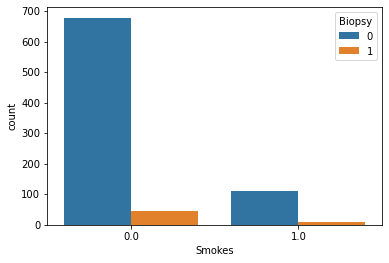

In [29]:
sns.countplot(x='Smokes',data=df,hue='Biopsy')

In [30]:
df.isnull().sum()[['Smokes','Smokes (years)','Smokes (packs/year)']]

Smokes                 12
Smokes (years)         12
Smokes (packs/year)    12
dtype: int64

**Since there are only 12 missing values and based on the EDA, it is clearly that most partients do not smoke. I will fill all null values with 0**

In [31]:
for i in ['Smokes','Smokes (years)','Smokes (packs/year)']:
    df[i].replace(np.nan, 0, inplace=True)

In [32]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

### Exploring 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)'

In [33]:
df[['Hormonal Contraceptives','Hormonal Contraceptives (years)']]

,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,1.0,3.00
4,1.0,15.00
...,...,...
853,0.0,0.00
854,1.0,8.00
855,1.0,0.08
856,1.0,0.08


<AxesSubplot:xlabel='Hormonal Contraceptives', ylabel='count'>

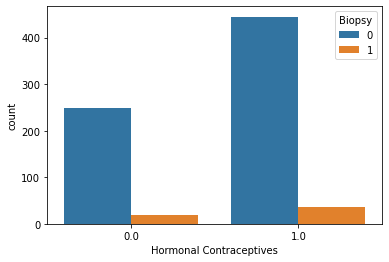

In [34]:
sns.countplot(x='Hormonal Contraceptives',data=df,hue='Biopsy')

<AxesSubplot:>

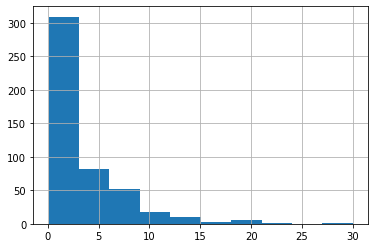

In [35]:
df[df['Hormonal Contraceptives (years)']>0]['Hormonal Contraceptives (years)'].hist()

<AxesSubplot:xlabel='First sexual intercourse', ylabel='Age'>

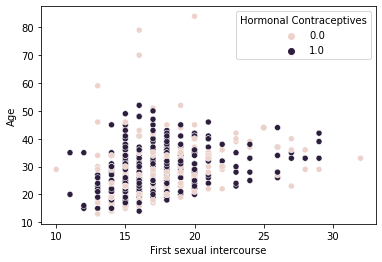

In [36]:
sns.scatterplot(x='First sexual intercourse',y='Age',data=df,hue='Hormonal Contraceptives')

The proprotion of people not using Hormonal Contraceptives and using Hormonal Contraceptives are greater than 0.5 but less than 1. Besides, it appears that it is harder to cluster these two groups. I will build a machine learning model to fill out those null values

In [37]:
df.reset_index(inplace=True)

In [38]:
df.drop('index',inplace=True,axis=1)

In [39]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [40]:
nn_contraceptives = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'STDs: Number of diagnosis',
                        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                        'Citology', 'Biopsy','Hormonal Contraceptives']]
nn_contraceptives = nn_contraceptives[nn_contraceptives['Hormonal Contraceptives'].isnull() == False]

In [41]:
nn_contraceptives.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Hormonal Contraceptives
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,0,1,0,1,0,0,0,0,0,1.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0


In [42]:
nn_contraceptives.isnull().sum()

Age                          0
Number of sexual partners    0
First sexual intercourse     0
Num of pregnancies           0
Smokes                       0
Smokes (years)               0
Smokes (packs/year)          0
STDs: Number of diagnosis    0
Dx:Cancer                    0
Dx:CIN                       0
Dx:HPV                       0
Dx                           0
Hinselmann                   0
Schiller                     0
Citology                     0
Biopsy                       0
Hormonal Contraceptives      0
dtype: int64

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
X = nn_contraceptives.drop('Hormonal Contraceptives',axis=1)
y = nn_contraceptives['Hormonal Contraceptives']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

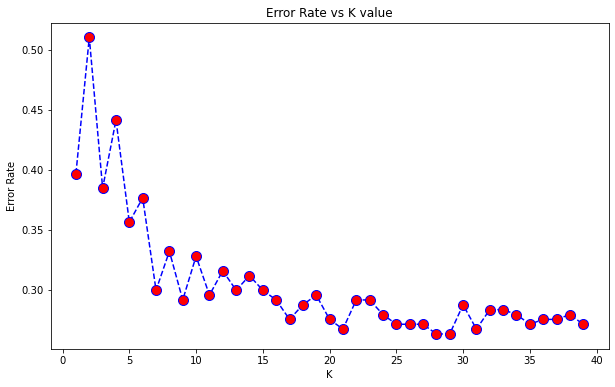

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
X = nn_contraceptives.drop('Hormonal Contraceptives',axis=1)
y = nn_contraceptives['Hormonal Contraceptives']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier(n_neighbors=28)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [48]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.7368421052631579


              precision    recall  f1-score   support

         0.0       0.66      0.30      0.41        76
         1.0       0.75      0.93      0.83       171

    accuracy                           0.74       247
   macro avg       0.70      0.62      0.62       247
weighted avg       0.72      0.74      0.70       247



[[ 23  53]
 [ 12 159]]


In [49]:
X.shape

(748, 16)

In [50]:
df['Hormonal Contraceptives'].dtypes

dtype('float64')

In [51]:
df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'STDs: Number of diagnosis',
                        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                        'Citology', 'Biopsy','Hormonal Contraceptives']].isnull().sum()

Age                            0
Number of sexual partners      0
First sexual intercourse       0
Num of pregnancies             0
Smokes                         0
Smokes (years)                 0
Smokes (packs/year)            0
STDs: Number of diagnosis      0
Dx:Cancer                      0
Dx:CIN                         0
Dx:HPV                         0
Dx                             0
Hinselmann                     0
Schiller                       0
Citology                       0
Biopsy                         0
Hormonal Contraceptives      108
dtype: int64

In [52]:
for i in range(len(df)):
    if df['Hormonal Contraceptives'].iloc[i] not in [0.0,1.0]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'STDs: Number of diagnosis',
                        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                        'Citology', 'Biopsy']].iloc[i]
        df['Hormonal Contraceptives'][i] = model.predict(datapoint.values.reshape(1,16))

In [53]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

If that person does not use Hormonal Contraceptives, fill Hormonal Contraceptives years with 0

In [54]:
def impute_year(cols):
    Hormonal_Contraceptives = cols[0]
    Hormonal_Contraceptives_years = cols[1]
    if Hormonal_Contraceptives == 0:
        return 0
    return Hormonal_Contraceptives_years

In [55]:
df['Hormonal Contraceptives (years)'] = df[['Hormonal Contraceptives','Hormonal Contraceptives (years)']].apply(impute_year,axis=1)

In [56]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)        82
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

In [57]:
X = df[['Number of sexual partners','First sexual intercourse','Num of pregnancies','Hormonal Contraceptives','Hormonal Contraceptives (years)']]

In [58]:
X

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,4.0,15.0,1.0,0.0,0.00
1,1.0,14.0,1.0,0.0,0.00
2,1.0,17.0,1.0,0.0,0.00
3,5.0,16.0,4.0,1.0,3.00
4,3.0,21.0,4.0,1.0,15.00
...,...,...,...,...,...
851,3.0,18.0,0.0,0.0,0.00
852,2.0,19.0,1.0,1.0,8.00
853,2.0,17.0,0.0,1.0,0.08
854,2.0,24.0,2.0,1.0,0.08


Filling Null Value of Hormonal Contraceptives year using Univariate Approach

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
X = impute_it.fit_transform(X)

In [60]:
X = pd.DataFrame(X)

In [61]:
X.tail()

,0,1,2,3,4
851,3.0,18.0,0.0,0.0,0.00
852,2.0,19.0,1.0,1.0,8.00
853,2.0,17.0,0.0,1.0,0.08
854,2.0,24.0,2.0,1.0,0.08
855,2.0,20.0,1.0,1.0,0.50


In [62]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
852,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
853,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
854,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [63]:
X.head()

,0,1,2,3,4
0,4.0,15.0,1.0,0.0,0.0
1,1.0,14.0,1.0,0.0,0.0
2,1.0,17.0,1.0,0.0,0.0
3,5.0,16.0,4.0,1.0,3.0
4,3.0,21.0,4.0,1.0,15.0


In [64]:
df[['Hormonal Contraceptives','Hormonal Contraceptives (years)']] = X[[3,4]]

In [65]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
852,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
853,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
854,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [66]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

### Explore 'IUD' and 'IUD (year)'

<AxesSubplot:xlabel='IUD', ylabel='count'>

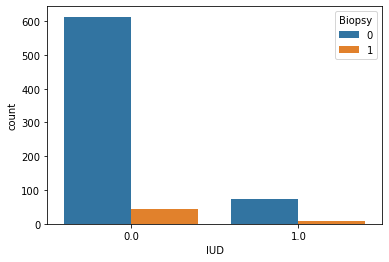

In [67]:
sns.countplot(x='IUD',data=df,hue='Biopsy')

In [68]:
df.corr()['IUD'].sort_values()

Smokes                               -0.056528
First sexual intercourse             -0.023856
STDs:syphilis                        -0.023767
STDs:HPV                             -0.018637
STDs:Hepatitis B                     -0.013169
STDs:molluscum contagiosum           -0.013169
STDs:pelvic inflammatory disease     -0.013169
STDs:genital herpes                  -0.013169
Citology                              0.007397
Smokes (packs/year)                   0.008210
STDs:HIV                              0.009307
Smokes (years)                        0.028119
STDs:vaginal condylomatosis           0.032037
STDs: Number of diagnosis             0.032497
Hormonal Contraceptives               0.033628
Hinselmann                            0.044621
Biopsy                                0.052944
STDs (number)                         0.056276
Number of sexual partners             0.057002
STDs                                  0.057949
Dx:HPV                                0.059765
Dx:CIN       

**Building a model to predict missing IUD values**

In [69]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [70]:
nn_IUD = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy', 'IUD']]

In [71]:
nn_IUD.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,IUD
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0,1,0,1,0,0,0,0,0,0.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0,0,0,0,0,0,0,0,0,0.0


In [72]:
nn_IUD = nn_IUD[nn_IUD['IUD'].isnull() == False]
nn_IUD.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,IUD
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0,1,0,1,0,0,0,0,0,0.0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0,0,0,0,0,0,0,0,0,0.0


In [73]:
X = nn_IUD.drop('IUD',axis=1)
y = nn_IUD['IUD']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
model = DecisionTreeClassifier()

In [76]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
predictions = model.predict(X_test)

In [78]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8278688524590164


              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       220
         1.0       0.18      0.21      0.19        24

    accuracy                           0.83       244
   macro avg       0.55      0.55      0.55       244
weighted avg       0.84      0.83      0.83       244



[[197  23]
 [ 19   5]]


In [79]:
datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                                         'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                                         'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 
                                         'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                                         'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']].iloc[0]
datapoint.values.reshape(1,18)

array([[18.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [80]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [81]:
for i in range(len(df)):
    if df['IUD'][i] not in [0,1]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                                         'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                                         'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 
                                         'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                                         'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']].iloc[i]
        df['IUD'][i] = model.predict(datapoint.values.reshape(1,18))

In [82]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

In [83]:
def impute_year_IUD(cols):
    IUD = cols[0]
    IUD_years = cols[1]
    if IUD == 0:
        return 0
    return IUD_years

In [84]:
df['IUD (years)'] = df[['IUD','IUD (years)']].apply(impute_year_IUD,axis=1)

<AxesSubplot:>

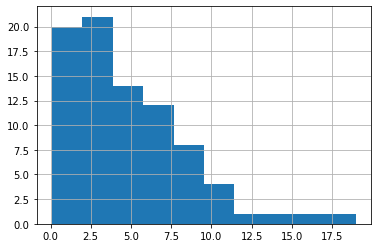

In [85]:
df[df['IUD (years)']>0]['IUD (years)'].hist(bins=10)

In [86]:
df[df['IUD (years)']>0]['IUD (years)'].mean()

4.596024096385542

**There are only 14 Null values left so I will full na with the mean value**

In [87]:
df['IUD (years)'].replace(np.nan, df[df['IUD (years)']>0]['IUD (years)'].mean(),inplace=True)

### Exploring STDs-related features

In [88]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [89]:
df[['STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']].describe()

,STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.103862,0.174434,0.057257,0.005326,0.055925,0.023968,0.001332,0.001332,0.001332,0.023968,0.001332,0.002663
std,0.305284,0.558748,0.232488,0.072835,0.229931,0.153052,0.036491,0.036491,0.036491,0.153052,0.036491,0.051571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

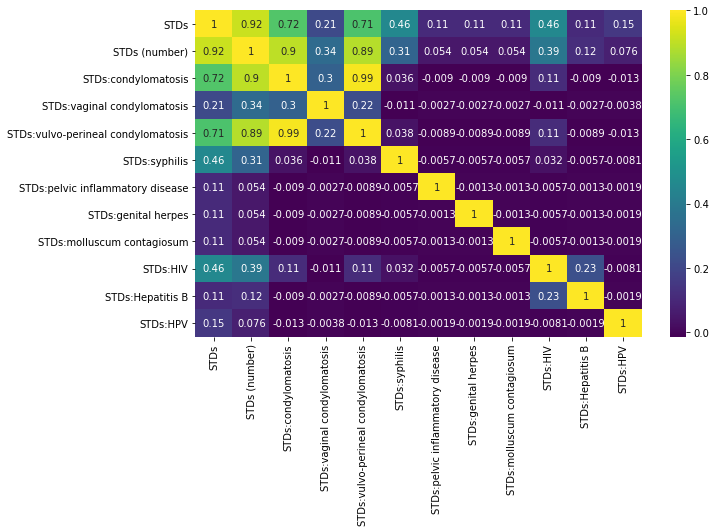

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']].corr(),cmap='viridis',annot=True)

In [91]:
df[['STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']].head()

,STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Build a model to predict the 'STDs:condylomatosis' values as this feature is very correlated to other features.**

In [92]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [93]:
nn_condylomatosis = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy','STDs:condylomatosis']]

In [94]:
nn_condylomatosis = nn_condylomatosis[nn_condylomatosis['STDs:condylomatosis'].isnull() == False]

In [95]:
X = nn_condylomatosis.drop('STDs:condylomatosis',axis=1)
y = nn_condylomatosis['STDs:condylomatosis']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
model = DecisionTreeClassifier()

In [98]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
predictions = model.predict(X_test)

In [100]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9395161290322581


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       232
         1.0       0.52      0.75      0.62        16

    accuracy                           0.94       248
   macro avg       0.75      0.85      0.79       248
weighted avg       0.95      0.94      0.94       248



[[221  11]
 [  4  12]]


In [101]:
X_train.shape

(503, 20)

In [102]:
for i in range(len(df)):
    if df['STDs:condylomatosis'][i] not in [0,1]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                        'IUD (years)', 'STDs: Number of diagnosis',
                        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                        'Citology', 'Biopsy']].iloc[i]
        df['STDs:condylomatosis'][i] = model.predict(datapoint.values.reshape(1,20))

**Since 'STDs:vaginal condylomatosis' and 'STDs:vulvo-perineal condylomatosis' are 99% correlated, I will drop the 'STDs:vulvo-perineal condylomatosis' column**

In [409]:
df.drop('STDs:vulvo-perineal condylomatosis',axis=1,inplace=True)

In [410]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                105
STDs (number)                       105
STDs:condylomatosis                   0
STDs:vaginal condylomatosis         105
STDs:syphilis                       105
STDs:pelvic inflammatory disease    105
STDs:genital herpes                 105
STDs:molluscum contagiosum          105
STDs:HIV                            105
STDs:Hepatitis B                    105
STDs:HPV                            105
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0


**Build a model to fill out STDs column**

In [411]:
nn_STDs = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy','STDs:condylomatosis','STDs']]

In [412]:
nn_STDs = nn_STDs[nn_STDs['STDs'].isnull() == False]

In [413]:
X = nn_STDs.drop('STDs',axis=1)
y = nn_STDs['STDs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [414]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9959677419354839


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       221
         1.0       1.00      0.96      0.98        27

    accuracy                           1.00       248
   macro avg       1.00      0.98      0.99       248
weighted avg       1.00      1.00      1.00       248



[[221   0]
 [  1  26]]


In [415]:
X_train.shape

(503, 21)

In [416]:
for i in range(len(df)):
    if df['STDs'][i] not in [0,1]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                        'IUD (years)', 'STDs: Number of diagnosis',
                        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                        'Citology', 'Biopsy','STDs:condylomatosis']].iloc[i]
        df['STDs'][i] = model.predict(datapoint.values.reshape(1,21))

In [417]:
df['STDs (number)'].value_counts()

0.0    673
2.0     36
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               856 non-null    int64  
 1   Number of sexual partners         856 non-null    float64
 2   First sexual intercourse          856 non-null    float64
 3   Num of pregnancies                856 non-null    float64
 4   Smokes                            856 non-null    float64
 5   Smokes (years)                    856 non-null    float64
 6   Smokes (packs/year)               856 non-null    float64
 7   Hormonal Contraceptives           856 non-null    float64
 8   Hormonal Contraceptives (years)   856 non-null    float64
 9   IUD                               856 non-null    float64
 10  IUD (years)                       856 non-null    float64
 11  STDs                              856 non-null    float64
 12  STDs (nu

In [419]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [434]:
X = df[['STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'STDs: Number of diagnosis']]

In [435]:
X['STDs (number)'].value_counts()

0.0    673
2.0     36
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [436]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer(max_iter=10000)
X = impute_it.fit_transform(X)

In [437]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [438]:
X = pd.DataFrame(X,columns=['STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'STDs: Number of diagnosis'])

In [439]:
X

,STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [440]:
X['STDs (number)'].astype(int).value_counts()

0    778
2     36
1     34
3      7
4      1
Name: STDs (number), dtype: int64

In [442]:
X['STDs (number)'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
851    0
852    0
853    0
854    0
855    0
Name: STDs (number), Length: 856, dtype: int32

In [443]:
X['STDs (number)'] = X['STDs (number)'].astype(int)

In [444]:
df['STDs (number)'] = X['STDs (number)']

In [445]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

<AxesSubplot:xlabel='STDs:vaginal condylomatosis', ylabel='count'>

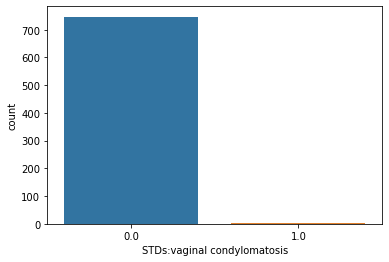

In [448]:
sns.countplot(x='STDs:vaginal condylomatosis',data=df)

**Since most patients were negative with STDs:vaginal condylomatosis, this feature is assumed to have very little predictive return value. I will drop this column**

In [449]:
df.drop('STDs:vaginal condylomatosis',axis=1,inplace=True)

<AxesSubplot:xlabel='STDs:syphilis', ylabel='count'>

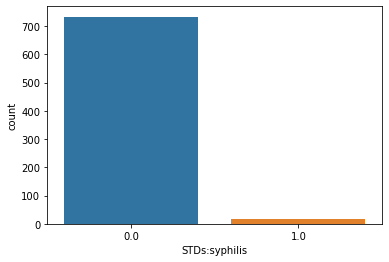

In [450]:
sns.countplot(x='STDs:syphilis',data=df)

<AxesSubplot:xlabel='STDs:pelvic inflammatory disease', ylabel='count'>

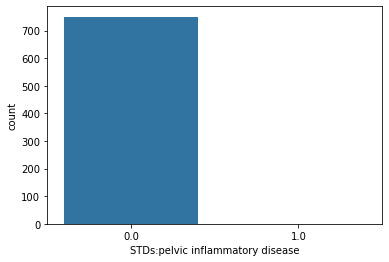

In [451]:
sns.countplot(x='STDs:pelvic inflammatory disease',data=df)

In [452]:
len(df[df['STDs:pelvic inflammatory disease'] == 1])

1

**I will drop STDs:pelvic inflammatory disease column**

In [453]:
df.drop('STDs:pelvic inflammatory disease',axis=1,inplace=True)

<AxesSubplot:xlabel='STDs:genital herpes', ylabel='count'>

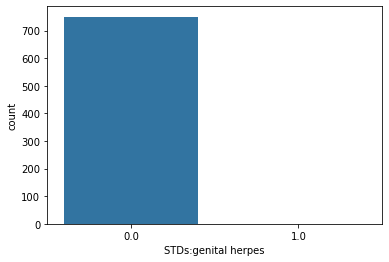

In [454]:
sns.countplot(x='STDs:genital herpes',data=df)

In [455]:
len(df[df['STDs:genital herpes'] == 1])

1

**I will drop STDs:genital herpes column**

In [456]:
df.drop('STDs:genital herpes',axis=1,inplace=True)

In [457]:
len(df[df['STDs:molluscum contagiosum'] == 1])

1

In [458]:
df.drop('STDs:molluscum contagiosum',axis=1,inplace=True)

In [459]:
len(df[df['STDs:HIV'] == 1])

18

In [460]:
len(df[df['STDs:Hepatitis B'] == 1])

1

In [461]:
df.drop('STDs:Hepatitis B',axis=1,inplace=True)

In [462]:
len(df[df['STDs:HPV'] == 1])

2

In [463]:
df.drop('STDs:HPV',axis=1,inplace=True)

In [464]:
len(df[df['STDs:syphilis'] == 1])

18

Null values for STDs:syphili and STDs:HIV column made up less then 2% of this. However, to improve model performance, I will attempt to predict null values

In [465]:
df.isnull().sum()

Age                                  0
Number of sexual partners            0
First sexual intercourse             0
Num of pregnancies                   0
Smokes                               0
Smokes (years)                       0
Smokes (packs/year)                  0
Hormonal Contraceptives              0
Hormonal Contraceptives (years)      0
IUD                                  0
IUD (years)                          0
STDs                                 0
STDs (number)                        0
STDs:condylomatosis                  0
STDs:syphilis                      105
STDs:HIV                           105
STDs: Number of diagnosis            0
Dx:Cancer                            0
Dx:CIN                               0
Dx:HPV                               0
Dx                                   0
Hinselmann                           0
Schiller                             0
Citology                             0
Biopsy                               0
dtype: int64

In [466]:
nn_syphilis = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs:condylomatosis', 
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs:syphilis']]
nn_syphilis = nn_syphilis[nn_syphilis['STDs:syphilis'].isnull() == False]

In [467]:
X = nn_syphilis.drop('STDs:syphilis',axis=1)
y = nn_syphilis['STDs:syphilis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [468]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9798387096774194


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       241
         1.0       1.00      0.29      0.44         7

    accuracy                           0.98       248
   macro avg       0.99      0.64      0.72       248
weighted avg       0.98      0.98      0.97       248



[[241   0]
 [  5   2]]


In [469]:
for i in range(len(df)):
    if df['STDs:syphilis'][i] not in [0,1]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                        'IUD (years)', 'STDs', 'STDs:condylomatosis', 
                        'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
                        'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']].iloc[i]
        df['STDs:syphilis'][i] = model.predict(datapoint.values.reshape(1,22))

In [470]:
nn_HIV = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs:condylomatosis', 
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs:syphilis', 'STDs:HIV']]
nn_HIV = nn_HIV[nn_HIV['STDs:HIV'].isnull() == False]

In [471]:
X = nn_HIV.drop('STDs:HIV',axis=1)
y = nn_HIV['STDs:HIV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [472]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9838709677419355


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       243
         1.0       0.60      0.60      0.60         5

    accuracy                           0.98       248
   macro avg       0.80      0.80      0.80       248
weighted avg       0.98      0.98      0.98       248



[[241   2]
 [  2   3]]


In [473]:
for i in range(len(df)):
    if df['STDs:HIV'][i] not in [0,1]:
        datapoint = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
                        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                        'IUD (years)', 'STDs', 'STDs:condylomatosis', 
                        'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN',
                        'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs:syphilis']].iloc[i]
        df['STDs:HIV'][i] = model.predict(datapoint.values.reshape(1,23))

In [474]:
df.isnull().sum()

Age                                0
Number of sexual partners          0
First sexual intercourse           0
Num of pregnancies                 0
Smokes                             0
Smokes (years)                     0
Smokes (packs/year)                0
Hormonal Contraceptives            0
Hormonal Contraceptives (years)    0
IUD                                0
IUD (years)                        0
STDs                               0
STDs (number)                      0
STDs:condylomatosis                0
STDs:syphilis                      0
STDs:HIV                           0
STDs: Number of diagnosis          0
Dx:Cancer                          0
Dx:CIN                             0
Dx:HPV                             0
Dx                                 0
Hinselmann                         0
Schiller                           0
Citology                           0
Biopsy                             0
dtype: int64

In [475]:
df[['Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']] = round(df[['Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']],2)

In [476]:
df.iloc[71]

Age                                34.00
Number of sexual partners           2.00
First sexual intercourse           17.00
Num of pregnancies                  3.00
Smokes                              0.00
Smokes (years)                      0.00
Smokes (packs/year)                 0.00
Hormonal Contraceptives             1.00
Hormonal Contraceptives (years)     3.71
IUD                                 0.00
IUD (years)                         0.00
STDs                                0.00
STDs (number)                       0.00
STDs:condylomatosis                 0.00
STDs:syphilis                       0.00
STDs:HIV                            0.00
STDs: Number of diagnosis           0.00
Dx:Cancer                           0.00
Dx:CIN                              0.00
Dx:HPV                              0.00
Dx                                  0.00
Hinselmann                          0.00
Schiller                            0.00
Citology                            0.00
Biopsy          

In [477]:
df.to_csv('Clean Data_2.csv')